In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

save_dir = 'mnist_images'
os.makedirs(save_dir, exist_ok=True)

for i in range(10):
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.savefig(os.path.join(save_dir, f'image_{i}_label_{y_train[i]}.png'), bbox_inches='tight', pad_inches=0)
    plt.close()

print(f"Images saved in {save_dir}")


Images saved in mnist_images


In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis= 1)
X_test = tf.keras.utils.normalize(X_test, axis= 1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape= (28, 28)))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs= 30)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8678 - loss: 0.4660
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9643 - loss: 0.1155
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9770 - loss: 0.0738
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0541
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9862 - loss: 0.0419
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9899 - loss: 0.0301
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0237
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9940 - loss: 0.0173
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9943 - loss: 0.0162
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9947 - loss: 0.0143
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9958 - loss: 0.0128
Epoch 12/30
1875/1875 ━━━━

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.1952


In [ ]:
model.save('handwrittendigit.h5')


Epoch 0, Loss: 0.3394
Epoch 10, Loss: 0.2223
Epoch 20, Loss: 0.1622
Epoch 30, Loss: 0.1332
Epoch 40, Loss: 0.1181
Epoch 50, Loss: 0.1095
Epoch 60, Loss: 0.1041
Epoch 70, Loss: 0.1007
Epoch 80, Loss: 0.0983
Epoch 90, Loss: 0.0966
Test Accuracy: 0.1143


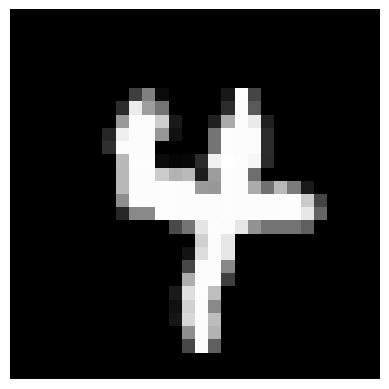

True Label: 4, Predicted Label: 1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0  # Normalize pixel values
y = mnist.target.astype(int).to_numpy().reshape(-1, 1)
# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the ANN structure
input_size = 784  # 28x28 pixels
hidden_size = 128
output_size = 10  # Digits 0-9

# Initialize weights
np.random.seed(42)
W1 = np.random.rand(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.rand(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training the model
def train(X, y, epochs=1000, learning_rate=0.01):
    global W1, b1, W2, b2
    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Calculate loss (mean squared error)
        loss = np.mean((y - a2) ** 2)

        # Backward pass
        error = a2 - y
        d_a2 = error * sigmoid_derivative(a2)

        error_hidden = np.dot(d_a2, W2.T)
        d_a1 = error_hidden * sigmoid_derivative(a1)

        # Update weights and biases
        W2 -= learning_rate * np.dot(a1.T, d_a2) / X.shape[0]
        b2 -= learning_rate * np.sum(d_a2, axis=0, keepdims=True) / X.shape[0]
        W1 -= learning_rate * np.dot(X.T, d_a1) / X.shape[0]
        b1 -= learning_rate * np.sum(d_a1, axis=0, keepdims=True) / X.shape[0]

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Train the model
train(X_train, y_train, epochs=100, learning_rate=0.01)

# Evaluate the model
def evaluate(X, y):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    predictions = np.argmax(a2, axis=1)
    true_labels = np.argmax(y, axis=1)

    accuracy = np.mean(predictions == true_labels)
    return accuracy

# Calculate accuracy on test set
accuracy = evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Load and test a specific image from the test set
def load_single_image(image_index):
    """Load a single image from the MNIST dataset."""
    image = X_test.iloc[image_index].values.reshape(28, 28)
    label = y_test[image_index]

    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

    image_normalized = image.flatten()  # Already normalized
    return image_normalized, label

def predict(image):
    """Predict the digit from the image using the trained model."""
    z1 = np.dot(image, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    predicted_label = np.argmax(a2)
    return predicted_label


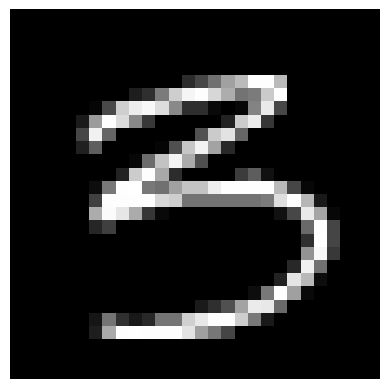

True Label: 3, Predicted Label: 1


In [ ]:

# Test a specific image (e.g., the first test image)
image_index = 100  # Change this index to test other images
test_image, true_label = load_single_image(image_index)
predicted_label = predict(test_image)

print(f"True Label: {np.argmax(true_label)}, Predicted Label: {predicted_label}")